In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.oneway as oneway
import scipy.stats as stats
import pylab

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [109]:
data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [165]:
data_new = data.loc[:,["horsepower", "origin"]]
data_new.head()

,horsepower,origin
0,130.0,usa
1,165.0,usa
2,150.0,usa
3,150.0,usa
4,140.0,usa


Is there a difference between horsepower in the cars with different origin? Alpha = 0.05,
"horsepower" is the dependent variable and "origin" is the independent variable. In this case we can use One-Way ANOVA.
Check the assumptions for One-Way ANOVA:

1. Check data for normality:

In [111]:
group1 = data_new[data_new["origin"] == "europe"]["horsepower"]
group2 = data_new[data_new["origin"] == "usa"]["horsepower"]
group3 = data_new[data_new["origin"] == "japan"]["horsepower"]

In [112]:
stats.shapiro(group1)

ShapiroResult(statistic=nan, pvalue=1.0)

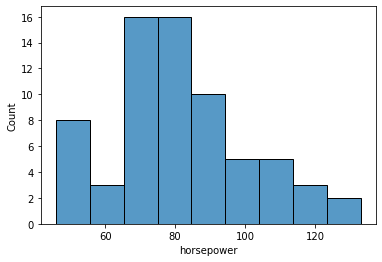

In [115]:
sns.histplot(group1)
plt.show()

In [113]:
stats.shapiro(group2)

ShapiroResult(statistic=nan, pvalue=1.0)

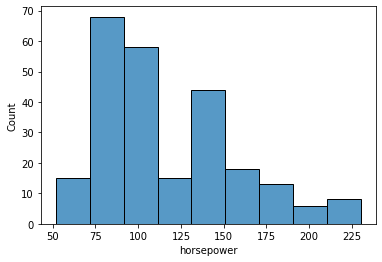

In [116]:
sns.histplot(group2)
plt.show()

In [114]:
stats.shapiro(group3)

ShapiroResult(statistic=0.9243755340576172, pvalue=0.00016959250206127763)

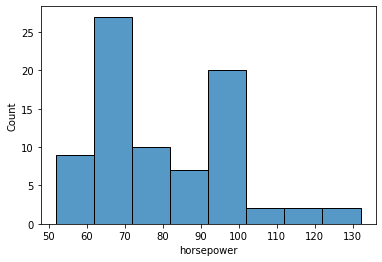

In [117]:
sns.histplot(group3)
plt.show()

Only data in group3 don't follow a normal distribution.

2. Check data for homogeneity of variances:

In [122]:
stats.fligner(group1, group2, group3)

FlignerResult(statistic=124.73568439011363, pvalue=8.203331963718093e-28)

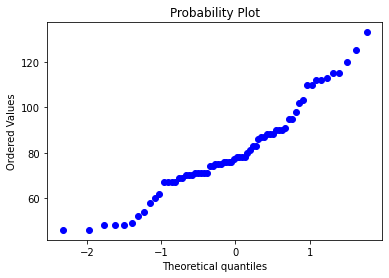

In [151]:
stats.probplot(group1,plot=pylab);

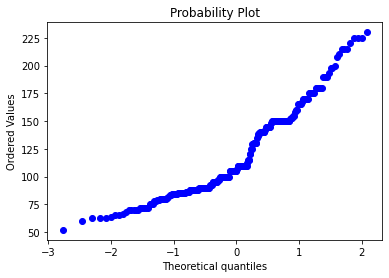

In [150]:
stats.probplot(group2,plot=pylab);

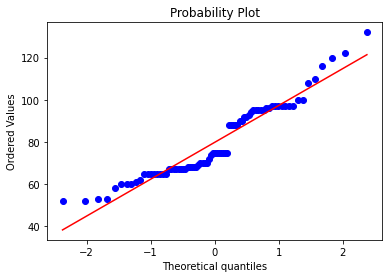

In [152]:
stats.probplot(group3,plot=pylab);

There is not homogeneity of variances.